## The third In-class-exercise (9/29/2021, 40 points in total)

The purpose of this exercise is to understand text representation.

#### Question 1 (10 points): Describe an interesting text classification or text mining task and explain what kind of features might be useful for you to build the machine learning model. List your features and explain why these features might be helpful. You need to list at least five different types of features.

In [94]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:

Text Classification and sentiment analysis is a very common machine learning problem and is used in a lot of activities like 
product predictions, movie recommendations, customer care and several others. 
In this exercise i am doing text classification on tweets data. The tweets dataset is about apple company. We will do text analysis 
task and extract features from the text data.

Features:
The features that might be useful are given below:
1. Finding the character length for each sentiment.
2. Word count. We can use this feature in sentiment analysis.
3. Average chacter length per word.
4. Special characters count.
5. Number Counts.

These are some of the features that are useful in sentiment analysis.
'''

'\nPlease write you answer here:\n\nText Classification and sentiment analysis is a very common machine learning problem and is used in a lot of activities like \nproduct predictions, movie recommendations, customer care and several others. \nIn this exercise i am doing text classification on tweets data. The tweets dataset is about apple company. We will do text analysis \ntask and extract features from the text data.\n\nFeatures:\nThe features that might be useful are given below:\n1. Finding the character length for each sentiment.\n2. Word count. We can use this feature in sentiment analysis.\n3. Average chacter length per word.\n4. Special characters count.\n5. Number Counts.\n\nThese are some of the features that are useful in sentiment analysis.\n'

### Question 2 (20 points): Write python code to extract these features you discussed above. You can collect a few sample text data for the feature extraction. 

In [95]:
# You code here (Please add comments in the code):

#importing libraries and required modules
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
%matplotlib inline
warnings.filterwarnings("ignore", category=DeprecationWarning)
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [96]:
#importing dataset
df = pd.read_csv('apple-twitter-sentiment-texts.csv')
print(df.shape)
df.head(5)

#lableing the dataset on average
conditions = [
    (df['sentiment'] == -1), # -1 means negaive result
    (df['sentiment'] == 0), # 0 means neutral result
    (df['sentiment'] == 1), # 1 means possitive result
]

# create a list of the values we want to assign for each condition
values = ['Negative', 'Neutral', 'Positive']

df['result'] = np.select(conditions, values)

df.head()

(1630, 2)


,text,sentiment,result
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1,Negative
1,What Happened To Apple Inc? http://t.co/FJEX...,0,Neutral
2,Thank u @apple I can now compile all of the pi...,1,Positive
3,The oddly uplifting story of the Apple co-foun...,0,Neutral
4,@apple can i exchange my iphone for a differen...,0,Neutral


In [97]:
df.groupby('result')['text'].count() #count the negative, possitive and neutral result and groupby on result

result
Negative    686
Neutral     801
Positive    143
Name: text, dtype: int64

In [98]:
df.groupby('result')['sentiment'].mean() 

result
Negative   -1
Neutral     0
Positive    1
Name: sentiment, dtype: int64

In [100]:
df['character_cnt'] = df['text'].str.len()
print(df.groupby('result')['character_cnt'].mean())
print(df.head())

result
Negative    91.062682
Neutral     98.446941
Positive    98.475524
Name: character_cnt, dtype: float64
                                                text  sentiment    result  \
0  Wow. Yall needa step it up @Apple RT @heynyla:...         -1  Negative   
1  What Happened To Apple Inc?   http://t.co/FJEX...          0   Neutral   
2  Thank u @apple I can now compile all of the pi...          1  Positive   
3  The oddly uplifting story of the Apple co-foun...          0   Neutral   
4  @apple can i exchange my iphone for a differen...          0   Neutral   

   character_cnt  
0            105  
1            101  
2            108  
3            115  
4             77  


In [101]:
df['word_counts'] = df['text'].str.split().str.len()
print(df.groupby('result')['word_counts'].mean())
print(df.head())

result
Negative    15.787172
Neutral     13.377029
Positive    14.846154
Name: word_counts, dtype: float64
                                                text  sentiment    result  \
0  Wow. Yall needa step it up @Apple RT @heynyla:...         -1  Negative   
1  What Happened To Apple Inc?   http://t.co/FJEX...          0   Neutral   
2  Thank u @apple I can now compile all of the pi...          1  Positive   
3  The oddly uplifting story of the Apple co-foun...          0   Neutral   
4  @apple can i exchange my iphone for a differen...          0   Neutral   

   character_cnt  word_counts  
0            105           20  
1            101           10  
2            108           19  
3            115           17  
4             77           15  


In [102]:
df['characters_per_word'] = df['character_cnt']/df['word_counts']
print(df.groupby('result')['characters_per_word'].mean())
print(df.head())


result
Negative    5.884512
Neutral     7.544972
Positive    6.865807
Name: characters_per_word, dtype: float64
                                                text  sentiment    result  \
0  Wow. Yall needa step it up @Apple RT @heynyla:...         -1  Negative   
1  What Happened To Apple Inc?   http://t.co/FJEX...          0   Neutral   
2  Thank u @apple I can now compile all of the pi...          1  Positive   
3  The oddly uplifting story of the Apple co-foun...          0   Neutral   
4  @apple can i exchange my iphone for a differen...          0   Neutral   

   character_cnt  word_counts  characters_per_word  
0            105           20             5.250000  
1            101           10            10.100000  
2            108           19             5.684211  
3            115           17             6.764706  
4             77           15             5.133333  


In [103]:
df['special_characters'] = df['text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
# print(df.head())
df[['text','special_characters']].head()

,text,special_characters
0,Wow. Yall needa step it up @Apple RT @heynyla:...,2
1,What Happened To Apple Inc? http://t.co/FJEX...,1
2,Thank u @apple I can now compile all of the pi...,1
3,The oddly uplifting story of the Apple co-foun...,0
4,@apple can i exchange my iphone for a differen...,1


In [104]:
df['num'] = df['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
print(df.groupby('result')['num'].mean())
print(df.head())

result
Negative    0.153061
Neutral     0.205993
Positive    0.181818
Name: num, dtype: float64
                                                text  sentiment    result  \
0  Wow. Yall needa step it up @Apple RT @heynyla:...         -1  Negative   
1  What Happened To Apple Inc?   http://t.co/FJEX...          0   Neutral   
2  Thank u @apple I can now compile all of the pi...          1  Positive   
3  The oddly uplifting story of the Apple co-foun...          0   Neutral   
4  @apple can i exchange my iphone for a differen...          0   Neutral   

   character_cnt  word_counts  characters_per_word  special_characters  num  
0            105           20             5.250000                   2    0  
1            101           10            10.100000                   1    0  
2            108           19             5.684211                   1    0  
3            115           17             6.764706                   0    0  
4             77           15             5.133333 

In [106]:
df['processedtext'] = df['text'].str.replace('[^\w\s]','',regex=True) 
df['processedtext'] = df['processedtext'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['processedtext'] = df['processedtext'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#Lines 4 to 6
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
df['processedtext'] = df['processedtext'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))

df[['character_cnt','word_counts','characters_per_word', 'special_characters', 'num', 'processedtext']].head()
df = df[['text', 'sentiment','character_cnt','word_counts','characters_per_word','special_characters','num','result']]
df.to_csv('processed.csv', index=False)

#### Question 3 (10 points): Use any of the feature selection methods mentioned in this paper "Deng, X., Li, Y., Weng, J., & Zhang, J. (2019). Feature selection for text classification: A review. Multimedia Tools & Applications, 78(3)." Select the most important features you extracted above, rank the features based on their importance in the descending order. 

In [107]:
import numpy as numpy
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
df['text'] = label_encoder.fit_transform(df['text'])
df['result'] = label_encoder.fit_transform(df['result'])
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

<ipython-input-107-090687eaea6d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = label_encoder.fit_transform(df['text'])
<ipython-input-107-090687eaea6d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['result'] = label_encoder.fit_transform(df['result'])
<ipython-input-107-090687eaea6d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [108]:
df.head()

,text,sentiment,character_cnt,word_counts,characters_per_word,special_characters,num,result
0,1483,0,105,20,5.250000,2,0,0
1,1442,1,101,10,10.100000,1,0,1
2,1347,2,108,19,5.684211,1,0,2
3,1377,1,115,17,6.764706,0,0,1
4,422,1,77,15,5.133333,1,0,1


In [109]:
from sklearn.feature_selection import chi2


X = df.drop('result',axis=1)
y = df['result']

chi_scores = chi2(X,y)

In [110]:
chi_scores

(array([1.22639963e+04, 9.71868445e+02, 2.27483831e+02, 1.48974898e+02,
        1.50269797e+02, 2.15228496e+01, 5.70124497e+00]),
 array([0.00000000e+000, 9.15057834e-212, 4.00418205e-050, 4.47210466e-033,
        2.34060536e-033, 2.12017930e-005, 5.78083250e-002]))

In [111]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

<AxesSubplot:>

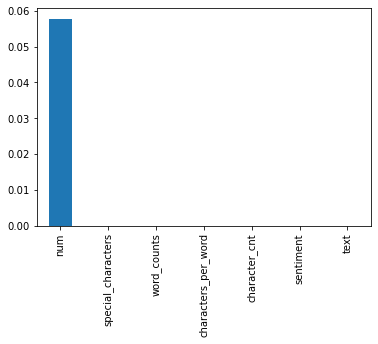

In [112]:
p_values.plot.bar()